In [1]:
import rebound
print(rebound.__build__)
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Nov 21 2019 16:54:33


In [13]:
def setup():
    sim = rebound.Simulation()
    #sim.softening = 0.01
    sim.add(m=1)
    for i in range(4):
        sim.add(m=1e-3,a=1.02+i*.4123,f=1.2443+i*2.25435436)
    sim.dt = sim.particles[1].P/20.
    sim.move_to_com()
    return sim
def run(sim,times,record=True):
    E0 = sim.calculate_energy()
    if record:
        Es = np.zeros(Nsamples)
        for i, t in enumerate(times):
            sim.integrate(t,exact_finish_time=0)
            E1 = sim.calculate_energy()
            Es[i] = np.abs((E0-E1)/E0)
    else:
        sim.integrate(times[-1],exact_finish_time=0)
        E1 = sim.calculate_energy()
        Es = np.ones(Nsamples)*np.abs((E0-E1)/E0)
    return Es

In [14]:
P1 = setup().particles[1].P
Nsamples = 1000
times = np.linspace(0.,130.,Nsamples)

In [15]:
Ndts = 140
dts = P1*np.logspace(-3,0,Ndts)
E_wh = np.zeros(Ndts)
E_mercurana2 = np.zeros(Ndts)
E_mercurana4 = np.zeros(Ndts)
E_mercurana6 = np.zeros(Ndts)
E_leapfrog = np.zeros(Ndts)
for i, dt in enumerate(dts):
    sim = setup()
    sim.integrator = "whfast"
    sim.dt = dt
    E_wh[i] = np.max(run(sim,times))
    sim = setup()
    sim.integrator = "mercurana"
    sim.ri_mercurana.order=2
    sim.dt = dt
    E_mercurana2[i] = np.max(run(sim,times))
    sim = setup()
    sim.integrator = "mercurana"
    sim.ri_mercurana.order=4
    sim.dt = dt    
    E_mercurana4[i] = np.max(run(sim,times))
    sim = setup()
    sim.integrator = "mercurana"
    sim.ri_mercurana.order=6
    sim.dt = dt    
    E_mercurana6[i] = np.max(run(sim,times))

KeyboardInterrupt: 

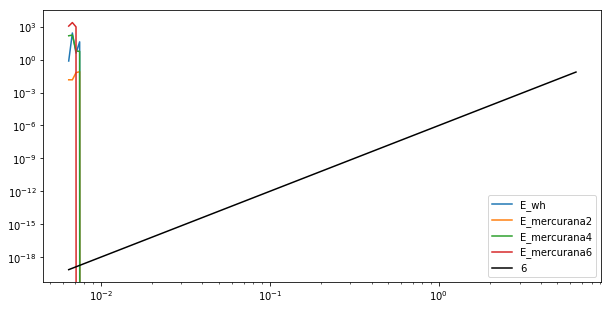

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(dts,E_wh,label="E_wh")
ax.plot(dts,E_mercurana2,label="E_mercurana2")
ax.plot(dts,E_mercurana4,label="E_mercurana4")
ax.plot(dts,E_mercurana6,label="E_mercurana6")
ax.plot(dts,1e-6*np.power(dts,6),label="6",color="black")
ax.legend();

In [ ]:
rebound.OrbitPlot(setup())